# MBAN 6400 Group Project(Part B)

In [47]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy.cluster.vq import whiten,vq,kmeans
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import umap.umap_ as umap
import plotly.express as px
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels


In [2]:
# K-means for Clustering
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# cluster metrics

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
# drop discrete variables
data1 = pd.read_csv('new_data.csv')
data = data1.drop(columns = ['Unnamed: 0','PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'])

In [4]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,ONEOFFPURCHASES_TOTAL,TOTAL_OWED,PCT_PAID
BALANCE,1.000000,0.321941,0.181261,0.164350,0.126469,0.496692,-0.077871,0.073165,-0.063180,0.449054,0.385152,0.154338,0.531296,0.322802,0.398992,0.164408,0.490062,-0.015447
BALANCE_FREQUENCY,0.321941,1.000000,0.133604,0.104226,0.124301,0.099447,0.229959,0.202387,0.176155,0.191614,0.141446,0.189419,0.095755,0.064953,0.137259,0.104248,0.169427,-0.050339
PURCHASES,0.181261,0.133604,1.000000,0.916845,0.679896,-0.051474,0.392920,0.498438,0.315485,-0.120033,-0.067175,0.689561,0.356977,0.603264,0.096696,0.916736,0.695751,-0.037452
ONEOFF_PURCHASES,0.164350,0.104226,0.916845,1.000000,0.330622,-0.031326,0.264861,0.524846,0.127663,-0.082563,-0.046212,0.545523,0.319735,0.567292,0.050887,0.999983,0.649309,-0.029256
INSTALLMENTS_PURCHASES,0.126469,0.124301,0.679896,0.330622,1.000000,-0.064244,0.442330,0.214145,0.511279,-0.132176,-0.073999,0.628108,0.256515,0.384084,0.135005,0.330333,0.452003,-0.034773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAYMENTS,0.322802,0.064953,0.603264,0.567292,0.384084,0.453238,0.103410,0.243579,0.085494,0.182995,0.255278,0.370832,0.421876,1.000000,0.130977,0.567238,0.768041,0.092090
MINIMUM_PAYMENTS,0.398992,0.137259,0.096696,0.050887,0.135005,0.141070,0.007962,-0.026384,0.033644,0.101284,0.111887,0.099937,0.127217,0.130977,1.000000,0.050912,0.172319,0.011463
ONEOFFPURCHASES_TOTAL,0.164408,0.104248,0.916736,0.999983,0.330333,-0.031255,0.264767,0.524893,0.127535,-0.082490,-0.046150,0.545373,0.319732,0.567238,0.050912,1.000000,0.649280,-0.029262
TOTAL_OWED,0.490062,0.169427,0.695751,0.649309,0.452003,0.681517,0.132971,0.302900,0.103855,0.364024,0.422953,0.450738,0.480229,0.768041,0.172319,0.649280,1.000000,-0.056194


## PCA

### explain 80% variance

#### After comparing 80% and 90% variance we decided to used 80% because the 80% has filter 3 components with variance of 92% (Why? Because the 3rd componets explains more than 10%)

In [5]:
pca = PCA(n_components=0.8, random_state=42)
pca.fit(data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(data), columns=PC_names)

In [6]:
pca_data.head()

,PC1,PC2,PC3
0,-0.466073,-0.112939,0.044726
1,-0.634076,-0.009619,-0.154795
2,0.336514,0.904828,0.167287
3,-0.577134,-0.010757,0.176604
4,-0.541545,0.026664,-0.110541


In [7]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp.to_csv('pca_component_value.csv')

#### the first compononent explains 59.9% variance, the second explains 17.5%, the third explains 10.4%

In [8]:
pca.explained_variance_ratio_

array([0.59875215, 0.17503195, 0.10430809])

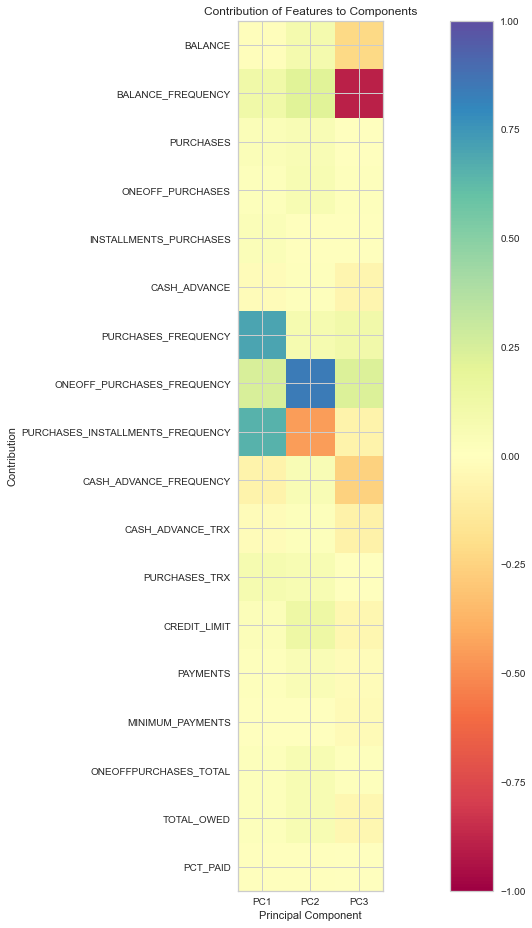

In [9]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.savefig('contribution.png')

In [10]:
pca_data.head()

,PC1,PC2,PC3
0,-0.466073,-0.112939,0.044726
1,-0.634076,-0.009619,-0.154795
2,0.336514,0.904828,0.167287
3,-0.577134,-0.010757,0.176604
4,-0.541545,0.026664,-0.110541


### KMeans - Elbow Method

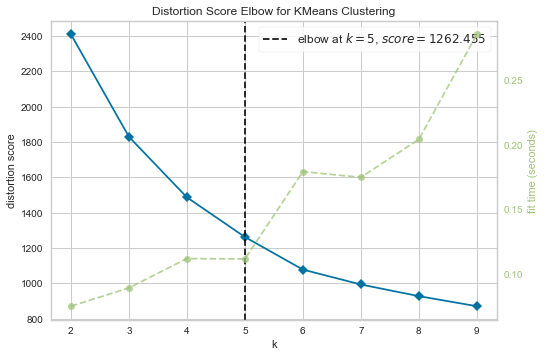

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(data)       
distortion_visualizer.show()      

#### The Elbow method tells us to use 5 clusters

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [13]:
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [14]:
data_cluster= data.copy()
data_cluster['Segment'] = kmeans.labels_

In [15]:
data_cluster.Segment.value_counts()

0    3310
1    2571
2    1229
4     980
3     860
Name: Segment, dtype: int64

In [16]:
segm_analysis = data_cluster.groupby(['Segment']).mean()
segm_analysis.to_csv('variable_mean_by_cluster.csv')

In [17]:
segm_analysis = data_cluster.groupby(['Segment']).mean().T
segm_analysis

Segment,0,1,2,3,4
BALANCE,0.116415,0.058519,0.008886,0.124341,0.083306
BALANCE_FREQUENCY,0.969719,0.927203,0.382563,0.987709,0.959133
PURCHASES,0.004427,0.019787,0.006959,0.087480,0.034470
ONEOFF_PURCHASES,0.004318,0.005115,0.005559,0.068424,0.037717
INSTALLMENTS_PURCHASES,0.001830,0.033891,0.005108,0.066707,0.006813
...,...,...,...,...,...
PAYMENTS,0.029796,0.025539,0.026196,0.084239,0.037647
MINIMUM_PAYMENTS,0.013574,0.012231,0.002247,0.012151,0.008554
ONEOFFPURCHASES_TOTAL,0.018759,0.019530,0.019979,0.081938,0.051669
TOTAL_OWED,0.037997,0.029481,0.017039,0.103299,0.047267


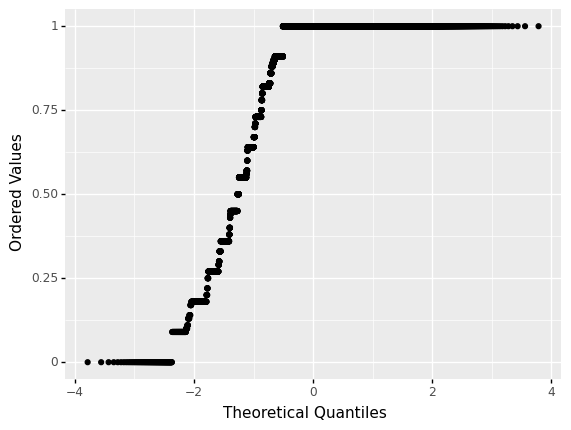

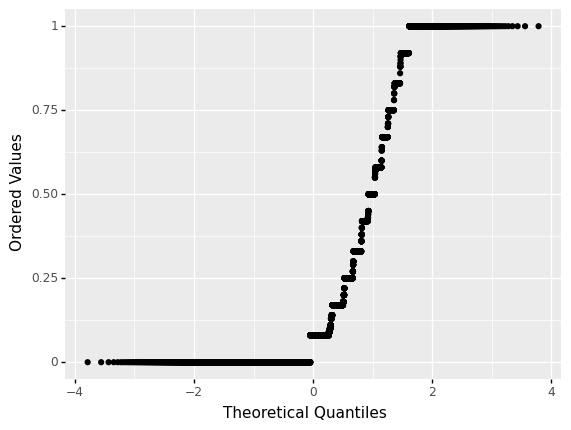

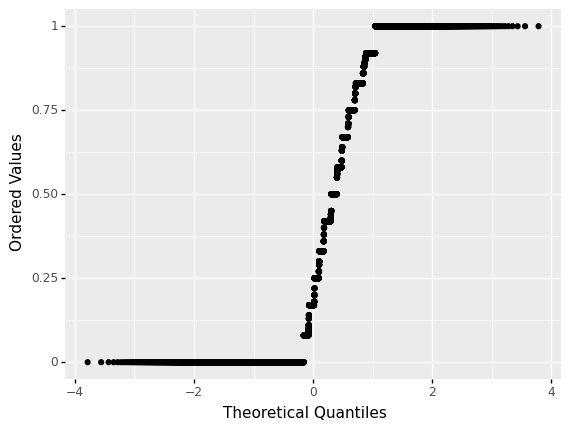

In [18]:
import plotnine as p9
for feature in ['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']:
    tq = stats.probplot(data_cluster[feature], dist='norm')
    df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": data_cluster[feature].sort_values() })
    # Create Q-Q plot
    print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles','Ordered Values') +p9.geom_point())

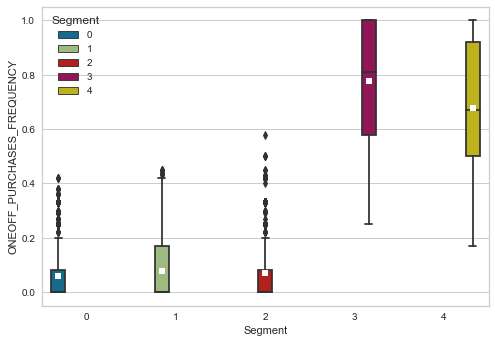

In [42]:
sns.boxplot(y="ONEOFF_PURCHASES_FREQUENCY",
                x="Segment",hue='Segment',
                data=data_cluster,showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"});

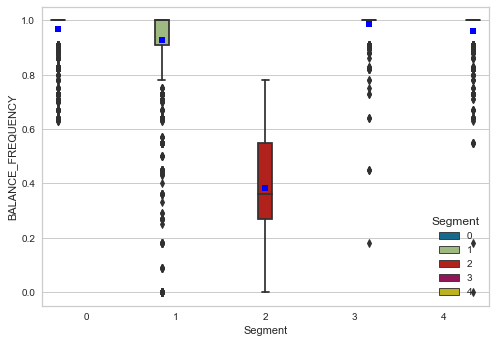

In [45]:
sns.boxplot(y="BALANCE_FREQUENCY",
                x="Segment",hue='Segment',
                data=data_cluster,showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"blue", "markeredgecolor":"blue"});

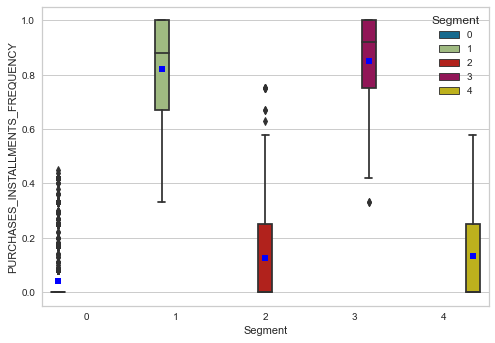

In [46]:
sns.boxplot(y="PURCHASES_INSTALLMENTS_FREQUENCY",
                x="Segment",hue='Segment',
                data=data_cluster,showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"blue", "markeredgecolor":"blue"});

In [50]:
import pingouin as pg

for feature in ['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT']:
    tukey = statsmodels.stats.multicomp.pairwise_tukeyhsd(endog=data_cluster[feature],groups=data_cluster['Segment'])
    print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0425  0.001 -0.0518 -0.0332   True
     0      2  -0.5872  0.001  -0.599 -0.5753   True
     0      3    0.018 0.0027  0.0044  0.0315   True
     0      4  -0.0106 0.1641 -0.0235  0.0023  False
     1      2  -0.5446  0.001 -0.5569 -0.5324   True
     1      3   0.0605  0.001  0.0466  0.0745   True
     1      4   0.0319  0.001  0.0186  0.0452   True
     2      3   0.6051  0.001  0.5894  0.6209   True
     2      4   0.5766  0.001  0.5614  0.5917   True
     3      4  -0.0286  0.001 -0.0451  -0.012   True
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0175  0.001  0.0078  0.0272   True
     0      2   0.0101 0.1697 -0.0023  0.0224 

### KMeans - Silhouette Method

#### The Sihouette method also supports the choice of 5 cluster

Parameter: {'n_clusters': 2} Score 0.44856777958483746
Parameter: {'n_clusters': 3} Score 0.4441495025114852
Parameter: {'n_clusters': 4} Score 0.3907069791464858
Parameter: {'n_clusters': 5} Score 0.3946774460238202
Parameter: {'n_clusters': 6} Score 0.3918312303136574
Parameter: {'n_clusters': 7} Score 0.3658117390877714
Parameter: {'n_clusters': 8} Score 0.33435716048485
Parameter: {'n_clusters': 9} Score 0.3371444725638253


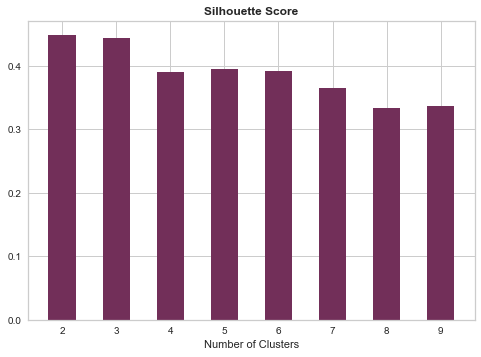

In [23]:
# candidate values for our number of cluster
parameters = [2,3, 4, 5,6,7,8,9]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.44856777958483746
For n_clusters = 3 The average silhouette_score is : 0.444109912192546
For n_clusters = 4 The average silhouette_score is : 0.3907488782060436
For n_clusters = 5 The average silhouette_score is : 0.3946774460238202
For n_clusters = 6 The average silhouette_score is : 0.3918312303136574


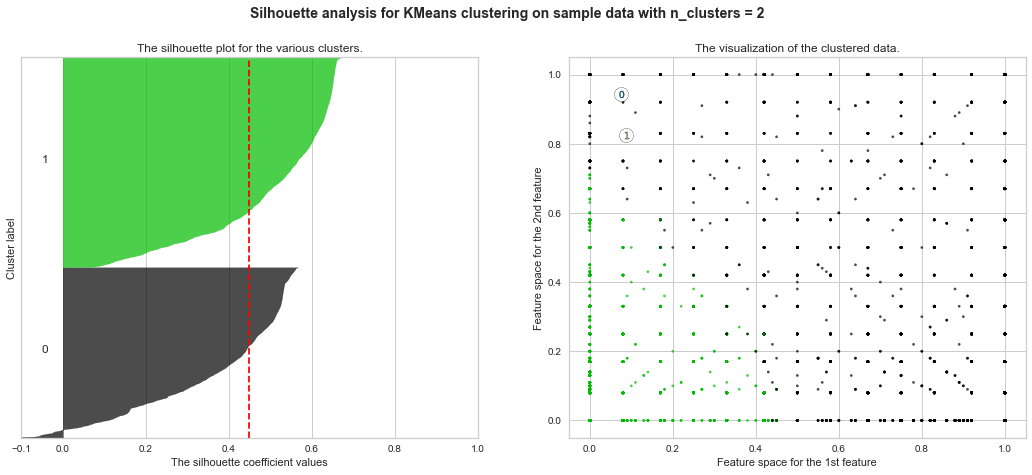

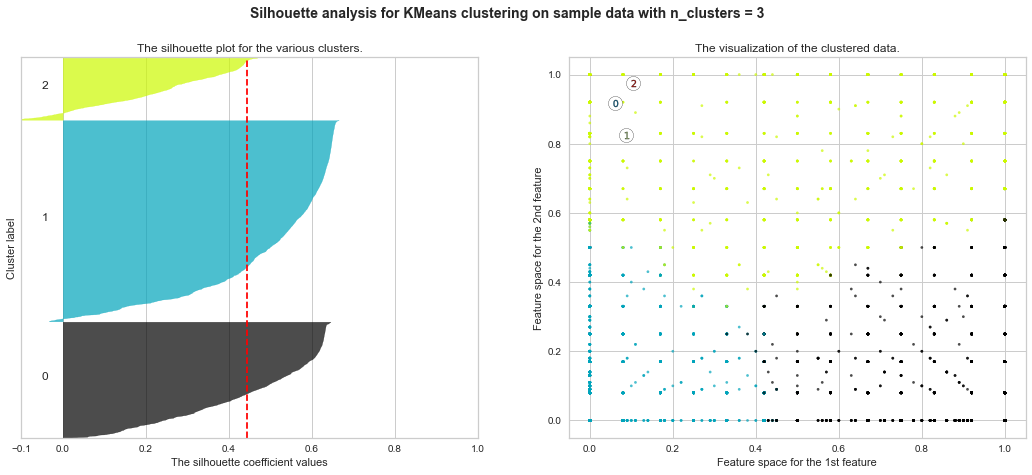

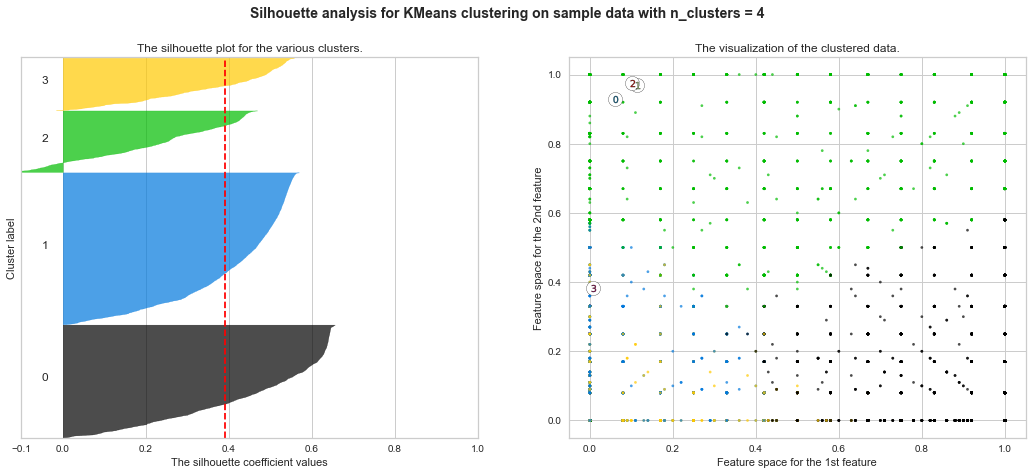

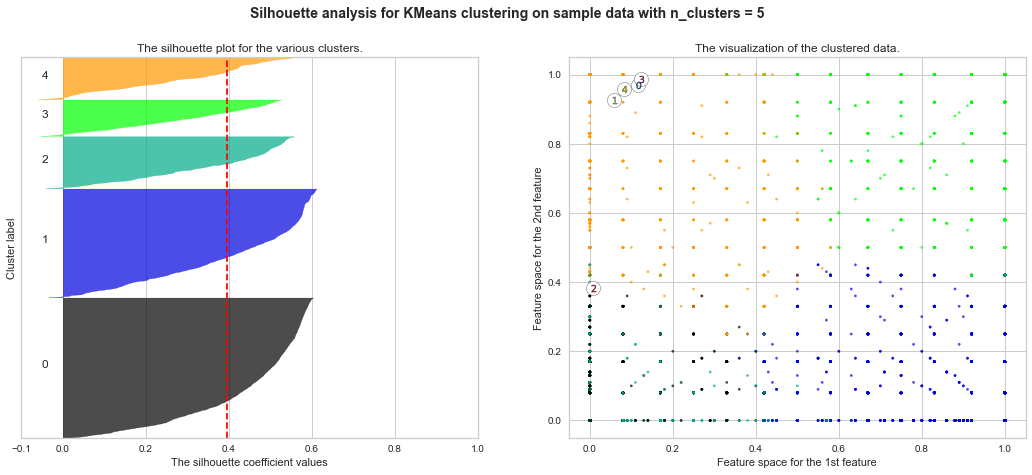

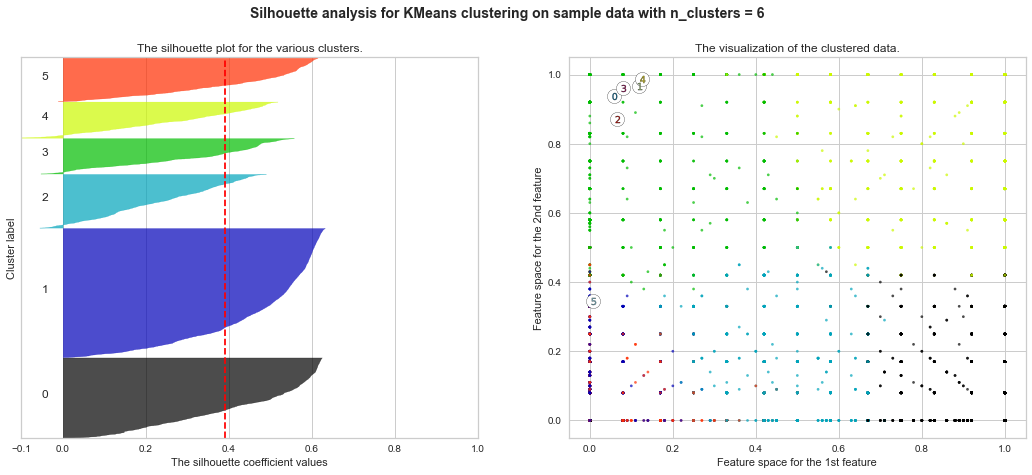

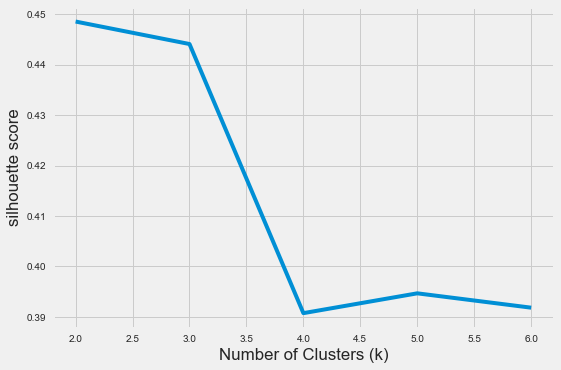

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style


range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data['PURCHASES_INSTALLMENTS_FREQUENCY'], data['ONEOFF_PURCHASES_FREQUENCY'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [25]:
def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat,columns=['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','label'])
    # Convert label data type from float to integer
    df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='BALANCE_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', z='PURCHASES_INSTALLMENTS_FREQUENCY', color=df['label'].astype(str), height=900, width=950)
#'BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'
    # Update chart looks
    fig.update_layout(title_text='segment distribution',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

In [26]:
chart(data[['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']], kmeans.labels_)

### The first principal component analysis
The first principal component is strongly correlated with four of the original variables. The first principal component increases with increasing INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and PURCHASES_TRX. 

This suggests that these four criteria vary together. If one increases, then the remaining ones tend to increase as well.

Furthermore, we see that the first principal component correlates most strongly with the PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. 

In fact, we could state that based on the correlation of PURCHASES_FREQUENCY(0.982), as from Part A of the project, both variables are highly correlated.

### The seconnd principal component analysis
The first principal component is strongly correlated with 1 of the original variables ONEOFF_PURCHASES_FREQUENCY.

### The third principal component analysis
The first principal component is negatively strongly correlated with 1 of the original variables. BALANCE_FREQUENCY.